In [1]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs

In [2]:
# Load dataset
df = pd.read_csv(r'database/DailyPlaysDataset.csv', sep=';', index_col=0, decimal=',')

# Whole dataset
df_range2 = '160'
df2 = df.loc[:, :df_range2]

# Set dataset range
df_range = '56'
df = df.loc[:, :df_range]
df

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,167,141,189,225,131,201,186,169,159,265
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,47,55,42,63,45,40,48,43,43,37
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,187,183,180,210,150,232,238,228,103,218
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,110,105,91,98,116,93,111,134,96,125
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,438,413,459,464,418,463,420,406,456,451
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,902,892,908,894,876,957,938,949,1036,992
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,1156,1115,932,1068,1096,1127,1118,1158,1169,1095
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,477,436,481,466,482,470,479,543,507,518
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,9,2,7,11,3,4,7,2,3,6
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,1251,1199,1205,1252,1221,1188,1219,1179,1201,1152


(96, 56)
[[ 35  33  61 ... 169 159 265]
 [  2   7  12 ...  43  43  37]
 [  1   1   3 ... 228 103 218]
 ...
 [ 65  44 107 ... 386 415 378]
 [  1   1   0 ...   0   0   0]
 [  3   4   2 ...  25  31  35]]


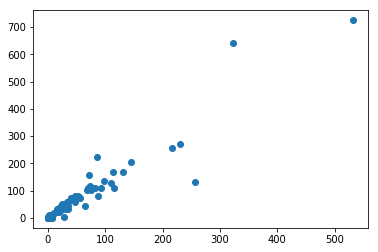

In [3]:
df_index = df.index.values.tolist()
df_list = df.values.tolist()
X = array(df_list)

print(X.shape)
print(X)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
from sklearn.neighbors import KDTree
tree = KDTree(X, leaf_size=20)              # doctest: +SKIP
dist, ind = tree.query(X, k=11)                # doctest: +SKIP
#print(X[:5])
print(ind)  # indices of 100 closest neighbors
print(dist)  # distances to 100 closest neighbors

[[ 0 76 69 ...  3 25 77]
 [ 1 28 18 ... 43 57 26]
 [ 2 86 27 ... 34 67 11]
 ...
 [93 30 53 ... 38 63 42]
 [94 59 62 ... 36 24 58]
 [95 18 72 ... 35 91  8]]
[[  0.         533.28510199 596.63389109 ... 756.45290666 759.68809389
  795.80336767]
 [  0.         110.2678557  116.47317288 ... 166.69733051 170.62239009
  174.71977564]
 [  0.         335.31626862 356.75201471 ... 470.45828721 473.92615459
  476.36225711]
 ...
 [  0.         419.17180249 476.22788663 ... 627.5691197  651.60647633
  675.30659704]
 [  0.           4.89897949  18.57417562 ...  38.74274126  41.70131892
   46.08687449]
 [  0.          63.96092557  80.8084154  ... 112.60550608 125.73384588
  126.67280687]]


In [6]:
# Set index of the songs, that neighbors should be calculated to.

# Find the indexes of k nearest neighbors to the ten test songs
# Katy Perry - Never Really Over (index 33)
# Taylor Swift - You Need To Calm Down (index 83)
# Shawn Mendes & Camila Cabello - SeÃ±orita (index 78)
# Ava Max - So Am I (index 5)
# Andreas Bourani - Auf uns (index 2)
# Meduza feat. Goodboys - Piece Of Your Heart (index 57)
# Pietro Lombardi - Nur Ein Tanz (index 68)
# Loud Luxury feat. brando - Body (index 46)
# Mark Forster - Sowieso (index 50)
# Camila Cabello feat. Young Thug - Havana (index 10)

# 969
# 931
# 893
# 870
# 854
# 979
# 1017
# 1024
# 1049
# 1056

#'Dotan - Numb' , 22
#'The Script - The Last Time', 85
#'Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart', 51
#'Dynoro & Gigi Dagostino - In My Mind', 23
#'Lea - Zu dir', 41
#'Marshmello feat. Chvrches - Here With Me', 53
#'Kygo & Whitney Houston - Higher Love', 37
#'Calvin Harris & Ragnbone Man - Giant', 9
#'Bausa - Was Du Liebe nennst', 7
#'Lotte & Max Giesinger - Auf das, was da noch kommt', 45

# Print index of nearest neighbors
print(ind[22])
print(ind[85])
print(ind[51])
print(ind[23])
print(ind[41])
print(ind[53])
print(ind[37])
print(ind[9])
print(ind[7])
print(ind[45])

[22 79 68 82 28 80 39 43 85  1 72]
[85 82 68 79 92 28 22 54  1 43 55]
[51 70 10 23 45 49 33 89 74 60 40]
[23 10 48 31 60 51 56 89 50 90  7]
[41 42 32 67 76  2 69 77 86 63 93]
[53 93 20 30 41 17 52 42 67 38 76]
[37  6  5 84 33 45 70  9 51 49 10]
[ 9 84  6 37 88 78  5 33 45 70 51]
[ 7 48 50 38 20 52 17 56 60 89 31]
[45 33 70 49 51 74 83 10 40  5 90]
